# CAR ACCIDENT SEVERITY

## 1. Methodology

### 1.1. Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/kien/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

**Note**: *We can see that there are one duplicate column "SEVERITYCODE". The missing data includes the following columns (less than 194673 rows): "X", "Y", "ADDRTYPE", "INTKEY", "LOCATION", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SDOTCOLNUM", "SPEEDING", "ST_COLCODE" and "ST_COLDESC"*

In [4]:
df.drop(['SEVERITYCODE.1'], axis=1, inplace=True)
len(df.columns)

37

As the expert knowledge, the "severity" depends on the following data:
<ul>
    <li>Accident location: Latitude("Y" column - float), Longitude("X" column - float)</li>
    <li>Road coditions: "ROADCOND" column - text</li>
    <li>Weather condition: "WEATHER" column - text</li>
    <li>Junction: "JUNCTIONTYPE" column - text</li>
    <li>Car speeding: "SPEEDING" column - boolean</li>
    <li>Number of people involved: "PERSONCOUNT" column - integer</li>
    <li>Light conditions: "LIGHTCOND" column - text</li>
    <li>Number of vehicles involved in: "VEHCOUNT" column - integer</li>
</ul>

**The problem is predicting the severity code by using the independent variables. It is a classification problem.**

At the end of this section, we just see the data and data type. We also split the data to input data and output data and see if there is missing data. We will do the data visualization and statistics in the next section.

### 1.2. Data visualization and statistics

In [5]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

We can see that the dataset contains only 2 severities: "1" (prop damage) and "2" (injury). It will limit the prediction because the classification can not perform with the label which doesn't exist in dataset such as "3" (fatality), "2b" (serious injury) and "0" (unknown).

We can use the Folium library to see the collision distribution on the map.

In [6]:
import folium
seattle_map = folium.Map(location=[47.608013, -122.335167], zoom_start=12)
accidents = folium.map.FeatureGroup()

for lat,lng in zip(df['Y'].dropna().head(1000), df['X'].dropna().head(1000)):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map.add_child(accidents)
seattle_map

The dataset is large to load all the data into map, so, I choose first 1000 points to display on the map. It seems that the Seattle Center have higher number of accidents.

**Drop the missing value in longtitude and latitude**

In [7]:
df.dropna(subset=['X', 'Y'], inplace=True)

In [8]:
df[['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SPEEDING', 'PERSONCOUNT', 'LIGHTCOND', 'VEHCOUNT', 'SEVERITYCODE']].isna().sum()

X                    0
Y                    0
ROADCOND          4858
WEATHER           4925
JUNCTIONTYPE      4193
SPEEDING        180619
PERSONCOUNT          0
LIGHTCOND         5012
VEHCOUNT             0
SEVERITYCODE         0
dtype: int64

In [9]:
df['SPEEDING'].value_counts()

Y    8720
Name: SPEEDING, dtype: int64

**The speed is "Y" if the accident relates to car speed. Then we fill the missing value with 0 and 'Y' by 1.**

In [10]:
df['SPEEDING'].replace([np.NaN, 'Y'], [0, 1], inplace=True)
df['SPEEDING'].value_counts()

0    180619
1      8720
Name: SPEEDING, dtype: int64

**The remain missing point is very small with total data, so we can drop all the missing data**

In [11]:
df.dropna(subset=['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SPEEDING', 'PERSONCOUNT', 'LIGHTCOND', 'VEHCOUNT', 'SEVERITYCODE'], inplace=True)
len(df)

180086

**We see the value count of SEVERITY after drop missing data**

In [16]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.690026
2    0.309974
Name: SEVERITYCODE, dtype: float64

**Do the statistics in "ROADCOND"**

[]

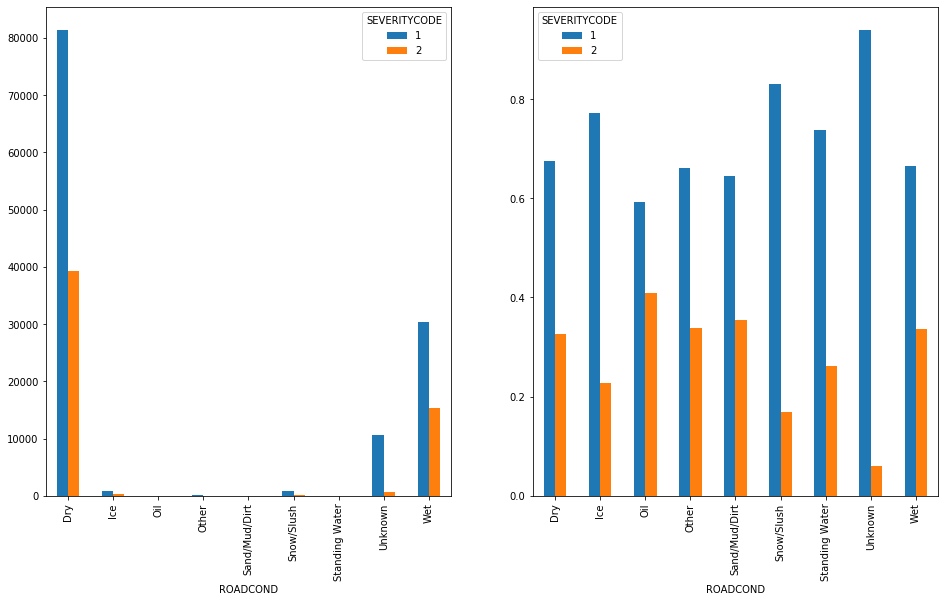

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*We can conclude that almost data in the road condition set (Dry, Wet, Unknown) and when an accident occurs, the probability of severity "1" is more than the probability severity "2". But we can not say the impact of road condition on the probability.*

**Do the statistics in "WEATHER"**

[]

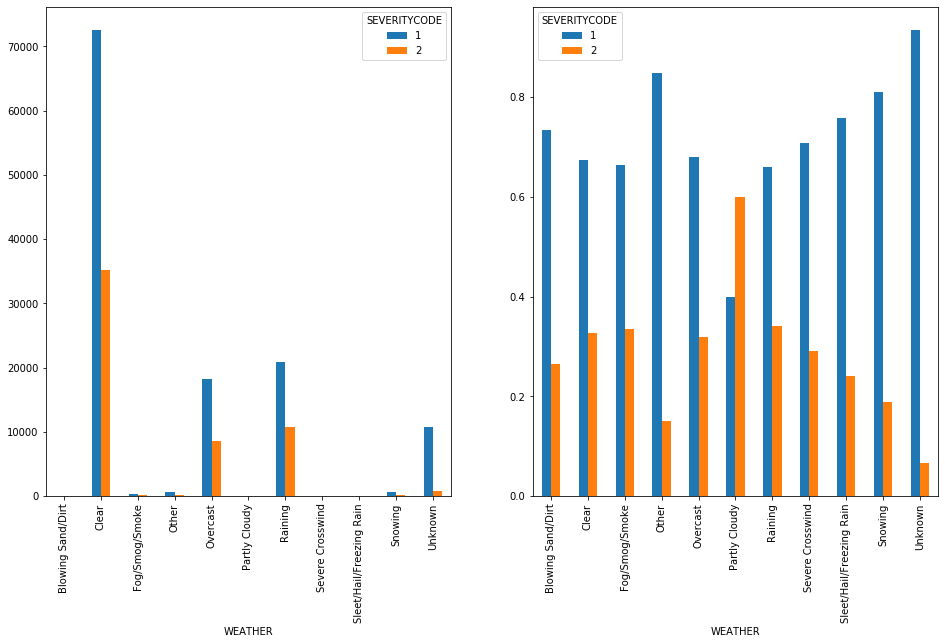

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*We see that the almost weather data is in the set (Clear, Overcast, Raining, Unknown) and when the weather is partly cloudy, the severity of accident is higher.*

**Do the statistics in "JUNCTIONTYPE"**

[]

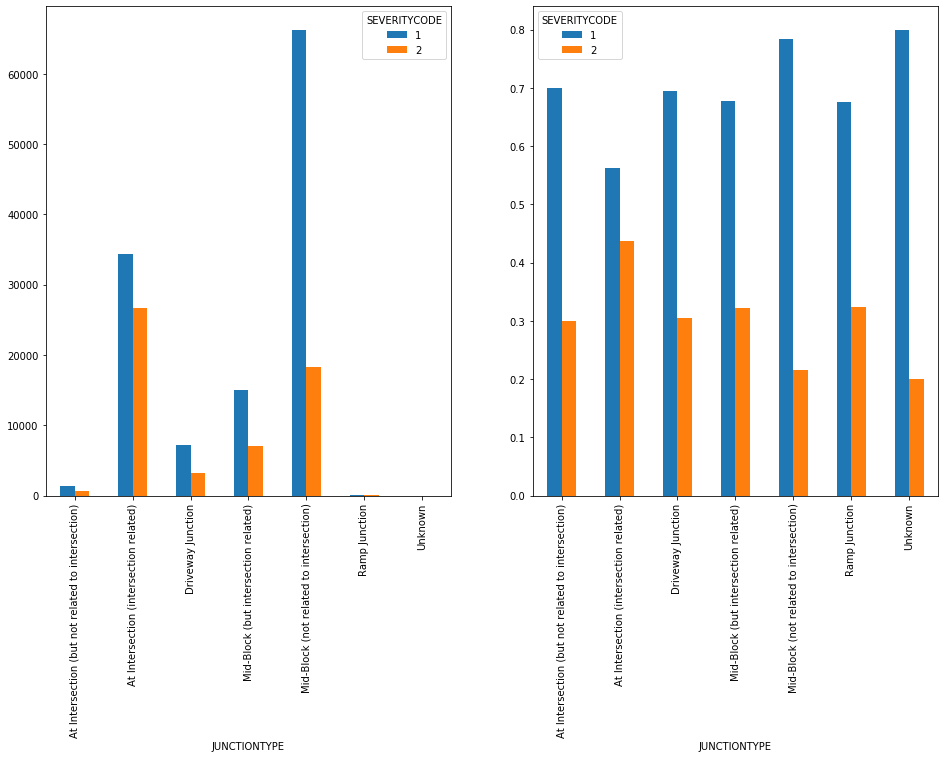

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

**Do the statistics in  "SPEEDING"**

[]

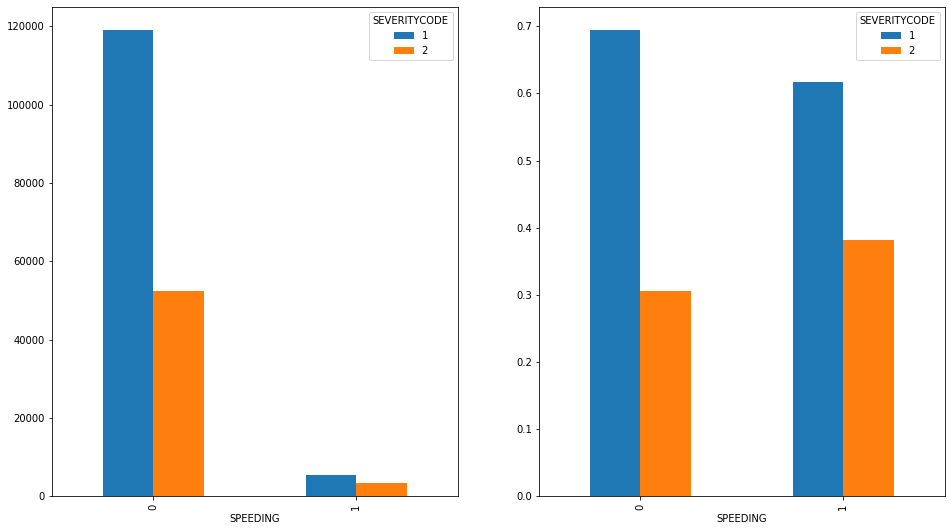

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

**Do the statistics in "LIGHTCOND"**

[]

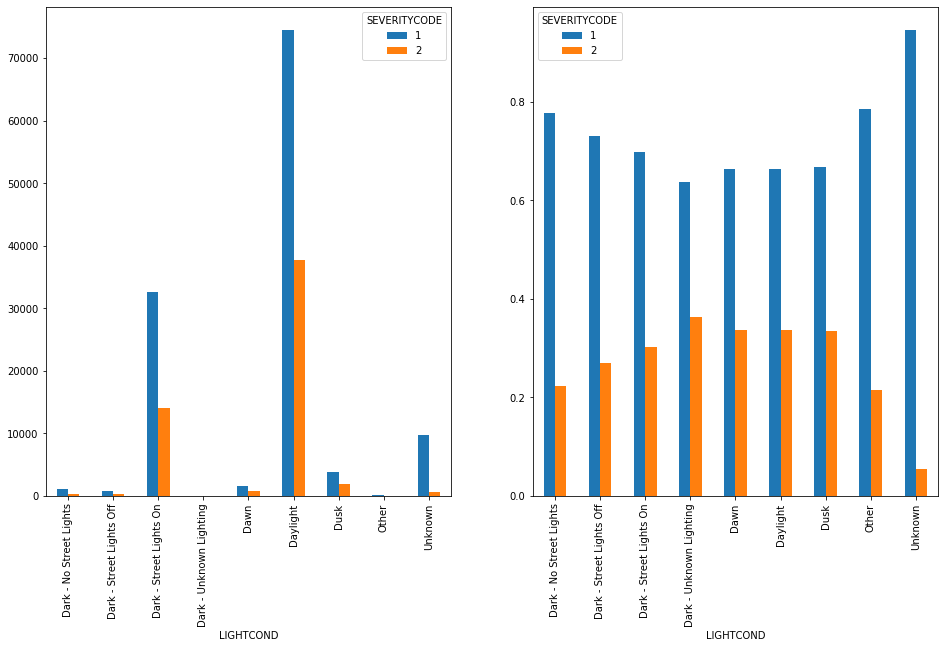

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

**Do the statistics in "PERSONCOUNT"**

count    180086.000000
mean          2.479371
std           1.368948
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

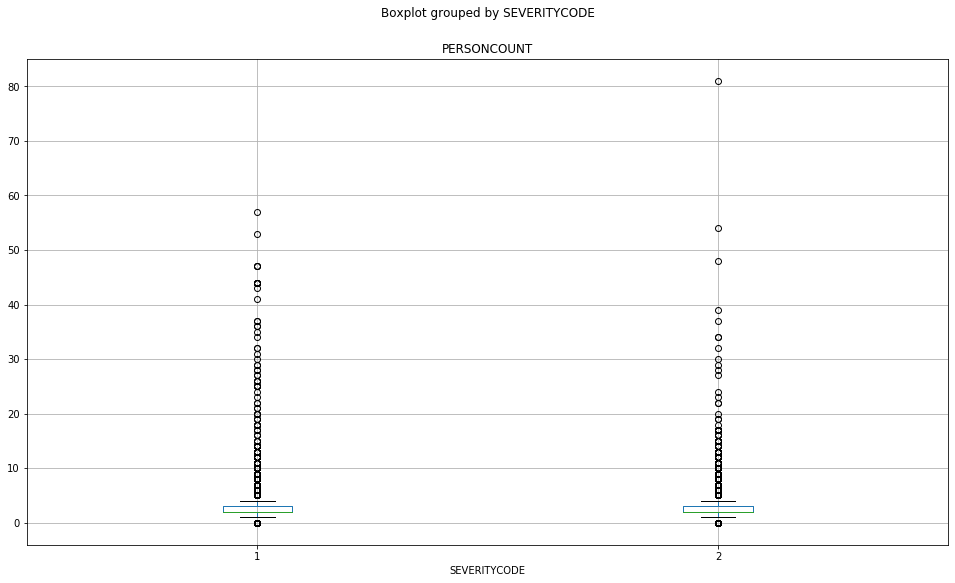

In [45]:
df.boxplot('PERSONCOUNT', by='SEVERITYCODE', figsize=(16,9))

**Do the statistics in "VEHCOUNT"**

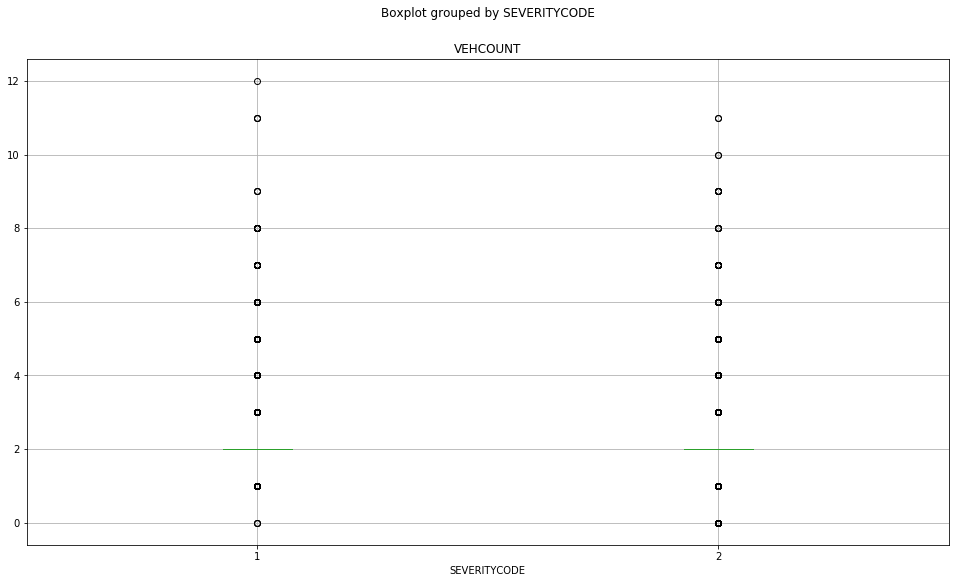

In [47]:
df.boxplot('VEHCOUNT', by='SEVERITYCODE', figsize=(16,9))

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, Y)
print("Remove number of rows: ", len(X) - len(X_rus))

df_rus = pd.concat([X_rus, y_rus], axis=1)

df_rus.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar')
plt.ylabel('Count')
plt.plot()